# Raw data processing
with scanpy

In [18]:
date = "080922"
import os
import re
import numpy as np, pandas as pd, scanpy as sc, matplotlib.pyplot as plt, seaborn as sb
# from gprofiler import GProfiler
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')
plt.rcParams['figure.figsize']=(8,8)

## Load and process data outputs from CellRanger

In [21]:
filelist = [file for file in os.listdir('data') if file.startswith("sample")]
meta = {"sample1":{"patient":"903", "type":"Neonate", "passage":11, "disease": "HLHS", "sex": "F"},
        "sample2": {"patient":"925", "type":"Neonate", "passage":5, "disease": "TAPVR", "sex": "F"},
        "sample3": {"patient":"930", "type":"Neonate", "passage":5, "disease": "TAPVR", "sex": "M"},
        "sample4": {"patient":"926", "type":"Child", "passage":6, "disease": "VSD", "sex": "M"},
        "sample5": {"patient":"1048", "type":"Child", "passage":12, "disease": "ASD", "sex": "F"},
        "sample6": {"patient":"896", "type":"Child", "passage":9, "disease": "VSD", "sex": "F"},
        "sample7": {"patient":"938", "type":"Child", "passage":6, "disease": "Subaortic Membrane Resection", "sex": "M"},
        "sample8": {"patient":"1092", "type":"Child", "passage":15, "disease": "ASD", "sex": "F"},
        "sample9": {"patient":"985", "type":"Neonate", "passage":7, "disease": "IAA", "sex": "M"},
        "sample10": {"patient":"2016", "type":"Neonate", "passage":12, "disease": "ASD/VSD/Coarction", "sex": "F"},
        }

datas = list()
for sample in filelist:
    datas.append(sc.read_10x_h5(f"./data/{sample}/filtered_feature_bc_matrix.h5"))
    datas[-1].var_names_make_unique()

    adata_pp = datas[-1].copy()
    sc.external.pp.scrublet(adata_pp)
    datas[-1].obs["predicted_doublet"] = adata_pp.obs["predicted_doublet"]
    datas[-1].obs["doublet_score"] = adata_pp.obs["doublet_score"]

    samp_meta = meta[sample]
    for k in samp_meta.keys():
        datas[-1].obs[k] = samp_meta[k]

data = datas[0].concatenate(datas[1:], batch_categories = filelist)
data.var_names_make_unique()
del adata_pp, datas

data = data[data.obs["predicted_doublet"]!=True]

sc.tl.pca(data)
sc.pp.neighbors(data, n_neighbors=30, metric="cosine")
sc.tl.umap(data, min_dist=0.1)

reading ./data/sample5/filtered_feature_bc_matrix.h5
 (0:00:00)
Running Scrublet
filtered out 20091 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 43.5%
    Scrublet finished (0:00:03)
reading ./data/sample2/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 16320 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%
    Scrublet finished (0:00:23)
reading ./data/sample3/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 16542 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 14.3%
    Scrublet finished (0:00:17)
reading ./data/sample4/filtered_feature_bc_matrix.h5
 (0:00:00)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 17461 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 9.7%
    Scrublet finished (0:00:06)
reading ./data/sample8/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 14198 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:19)
reading ./data/sample1/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 15986 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:34)
reading ./data/sample6/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 15502 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 10.1%
    Scrublet finished (0:00:23)
reading ./data/sample7/filtered_feature_bc_matrix.h5
 (0:00:00)
Running Scrublet


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 18712 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.3%
    Scrublet finished (0:00:07)
reading ./data/sample9/filtered_feature_bc_matrix.h5
 (0:00:00)
Running Scrublet
filtered out 27631 genes that are detected in less than 3 cells


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.5%
    Scrublet finished (0:00:07)
reading ./data/sample10/filtered_feature_bc_matrix.h5
 (0:00:01)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Running Scrublet
filtered out 15670 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.62
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:21)


/Users/jhoff18/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


computing PCA
    with n_comps=50
    finished (0:02:15)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:09)


In [26]:
# Quality control metrics
data.obs['n_counts'] = data.X.sum(1)
data.obs['log_counts'] = np.log(data.obs['n_counts'])
data.obs['n_genes'] = (data.X > 0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in data.var_names]
data.obs['mt_frac'] = data.X[:, mt_gene_mask].sum(1)/data.obs['n_counts'].to_numpy().reshape(data.shape[0],1)

data.write(date+"_raw_data.h5ad")

In [27]:
# Get ribo count
ribo_gene_mask = data.var_names.map(lambda s: re.search("^RP[SL]", s) != None).to_list()
ribo_frac = np.divide(data.X[:, ribo_gene_mask].sum(axis=1).flatten(),data.obs['n_counts'].to_numpy().flatten())
data.obs["ribo_frac"] = ribo_frac.reshape(data.n_obs, 1)

In [28]:
# object: 
data

AnnData object with n_obs × n_vars = 72778 × 36601
    obs: 'predicted_doublet', 'doublet_score', 'patient', 'type', 'passage', 'disease', 'sex', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'ribo_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

#### Sample 9 (Patient 985) has low counts and small number of distinctly expressed genes

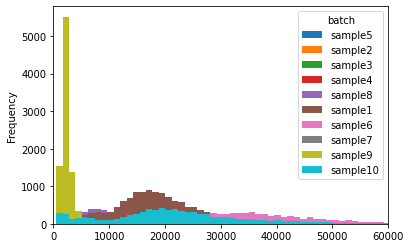

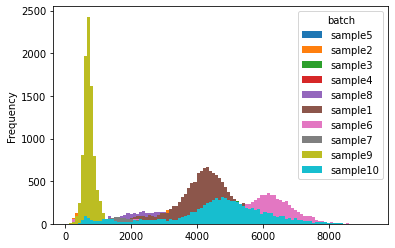

In [30]:
data.obs.pivot(columns="batch", values="n_counts").plot.hist(bins=100)
plt.xlim(0,60000)
plt.show()
data.obs.pivot(columns="batch", values="n_genes").plot.hist(bins=100)
plt.show()